In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate test data
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

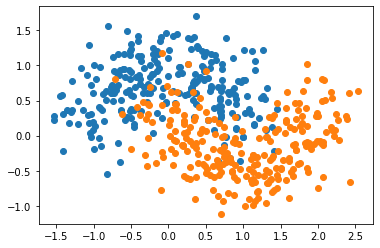

In [4]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
logi_clf = LogisticRegression()
logi_clf.fit(X_train, y_train)
logi_clf.score(X_test, y_test)

0.912

In [14]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.936

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.808

## Using resemble learning to predict

In [17]:
y_predict1 = logi_clf.predict(X_test)
y_predict2 = svc_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')
y_predict[:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.928

## Hard voting classifier (sklearn)
### hard denotes abide by majority

In [22]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('logi_clf', LogisticRegression()), 
    ('svc_clf', SVC()), 
    ('dt_clf', DecisionTreeClassifier(random_state=10))
], voting='hard')

In [23]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.928

## Soft voting classifier (sklearn)

In [26]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(estimators=[
    ('logi_clf', LogisticRegression()), 
    ('svc_clf', SVC(probability=True)), 
    ('dt_clf', DecisionTreeClassifier(random_state=10))
], voting='soft')

voting_clf_soft.fit(X_train, y_train)
voting_clf_soft.score(X_test, y_test)

0.904

## Bagging and pasting

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100,
                               bootstrap=True)

In [28]:
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.912

In [29]:
# Better than merely using DecisionTreeClassifier
det_clf = DecisionTreeClassifier()
det_clf.fit(X_train, y_train)
det_clf.score(X_test, y_test)

0.824

In [30]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5000, max_samples=100,
                               bootstrap=True)
bagging_clf2.fit(X_train, y_train)
bagging_clf2.score(X_test, y_test)

0.92

### Note that about 37% data are not selected during the bagging process. Without spliting sample data, oob_score_ (OOB: Out of Bag) can use the unselected data to test the model

In [32]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf2.fit(X, y)
bagging_clf2.oob_score_

0.904

In [ ]:
### Use n_jobs to enable parallel computing

In [34]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000, max_samples=100,
                               bootstrap=True)
bagging_clf.fit(X_train, y_train)

CPU times: user 1.22 s, sys: 16.7 ms, total: 1.23 s
Wall time: 1.24 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=1000)

In [35]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000, max_samples=100,
                               bootstrap=True, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

CPU times: user 127 ms, sys: 102 ms, total: 229 ms
Wall time: 1.84 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=1000, n_jobs=-1)

### Besides randomly fetch samples to train models (In the examples above, we fetch 100 samples from 500 or 1000 samples to train each model), we can randomly fetch features (random subspaces) or randomly fetch both sample and features (random patches)

In [39]:
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=500,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.806

In [40]:
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.868